In [3]:
import numpy as np
import math
import os
import cv2
from tqdm import tqdm
import pandas as pd
from glob import glob

In [4]:

def find_interArea(box1, box2):
    xmin1, ymin1, xmax1, ymax1 = box1
    xmin2, ymin2, xmax2, ymax2 = box2

    xmin = max(xmin1, xmin2)
    ymin = max(ymin1, ymin2)
    xmax = min(xmax1, xmax2)
    ymax = min(ymax1, ymax2)

    return [xmin, ymin, xmax, ymax]

def cal_iou(box1, box2):
    """
    :param box1: = [xmin1, ymin1, xmax1, ymax1]
    :param box2: = [xmin2, ymin2, xmax2, ymax2]
    :return: 
    """
    xmin1, ymin1, xmax1, ymax1 = box1
    xmin2, ymin2, xmax2, ymax2 = box2
    # 计算每个矩形的面积
    s1 = (xmax1 - xmin1) * (ymax1 - ymin1)  # b1的面积
    s2 = (xmax2 - xmin2) * (ymax2 - ymin2)  # b2的面积
 
    # 计算相交矩形
    xmin, ymin, xmax, ymax = find_interArea(box1, box2)
 
    w = max(0, xmax - xmin)
    h = max(0, ymax - ymin)
    a1 = w * h  # C∩G的面积
    a2 = s1 + s2 - a1
    iou = a1 / a2 #iou = a1/ (s1 + s2 - a1)
    return iou


In [13]:
classes = ['car', 'hov', 'people', 'motor']

label_list = sorted(glob('./train/*.txt'))
IOU = [[],[],[],[]]
Bbox = [[],[],[],[]]
width = [[],[],[],[]]
height = [[],[],[],[]]
for l in tqdm(label_list):
    gt = [[],[],[],[]]
    with open(l, 'r') as f:
        for i in f.readlines():
            line = list(map(lambda x: float(x), i.split(',')))
            gt[int(line[0])].append([line[1], line[2], line[1]+line[3], line[2]+line[4]])
            width[int(line[0])].append(line[3])
            height[int(line[0])].append(line[4])

    for c in range(len(gt)):
        Bbox[c].extend([(bbox[3]-bbox[1])*(bbox[2]-bbox[0])  for bbox in gt[c]])
        for g_1 in gt[c]:
            IOU[c].extend([iou*100 for iou in [cal_iou(g_1, g_2) for g_2 in gt[c]] if iou>0 and iou<1])
    

100%|██████████| 1000/1000 [00:14<00:00, 71.05it/s]


In [11]:
print(Bbox[3][:10])

[184.0, 189.0, 207.0, 897.0, 858.0, 2583.0, 432.0, 160.0, 299.0, 230.0]


In [7]:
print(pd.Series(Bbox[0]).quantile(0.99))
print(pd.Series(Bbox[1]).quantile(0.99))
print(pd.Series(Bbox[2]).quantile(0.99))
print(pd.Series(Bbox[3]).quantile(0.99))

19489.679999999993
37867.259999999624
1850.0
3442.1799999999957


C:\Users\LWY\AppData\Local\Temp/ipykernel_30280/3027260328.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('IOU.jpg', cmap=plt.cm.hot)


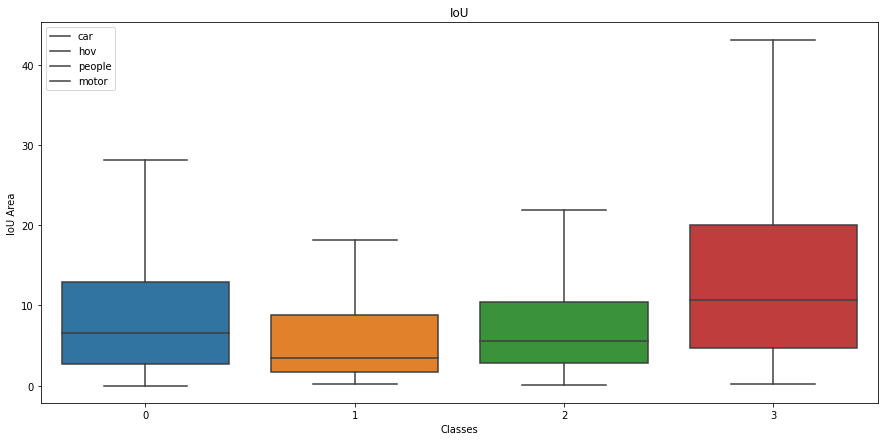

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize =(15,7))
sns.boxplot(data = IOU, showfliers = False)
# plt.hist(iou, bins = list(range(0, 100, 20)))
plt.xlabel("Classes")
plt.ylabel("IoU Area")
# plt.xticks(list(range(0, 100, 20)))
plt.legend(classes)
plt.title('IoU')
# Show plot
# plt.show()
plt.savefig('IOU.jpg', cmap=plt.cm.hot)

C:\Users\LWY\AppData\Local\Temp/ipykernel_30280/1856328251.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Bbox.jpg', cmap=plt.cm.hot)


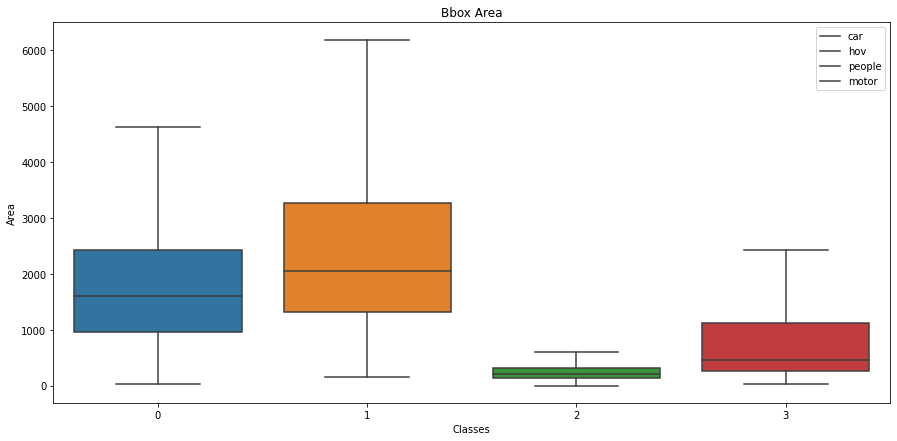

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize =(15,7))
sns.boxplot(data = Bbox, showfliers = False)
# plt.hist(iou, bins = list(range(0, 100, 20)))
plt.xlabel("Classes")
plt.ylabel("Area")
# plt.xticks(list(range(0, 100, 20)))
plt.legend(classes)
plt.title('Bbox Area')
# Show plot
# plt.show()
plt.savefig('Bbox.jpg', cmap=plt.cm.hot)

C:\Users\LWY\AppData\Local\Temp/ipykernel_30280/1338590074.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Width.jpg', cmap=plt.cm.hot)


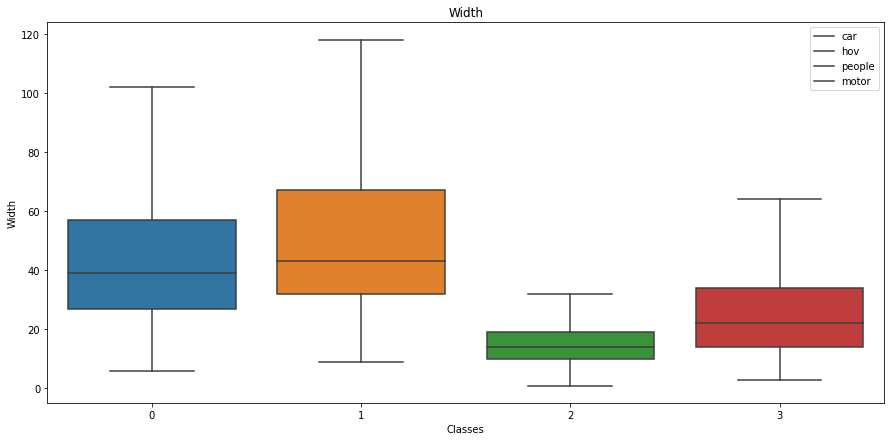

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize =(15,7))
sns.boxplot(data = width, showfliers = False)
# plt.hist(iou, bins = list(range(0, 100, 20)))
plt.xlabel("Classes")
plt.ylabel("Width")
# plt.xticks(list(range(0, 100, 20)))
plt.legend(classes)
plt.title('Width')
# Show plot
# plt.show()
plt.savefig('Width.jpg', cmap=plt.cm.hot)

C:\Users\LWY\AppData\Local\Temp/ipykernel_30280/343233196.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Height.jpg', cmap=plt.cm.hot)


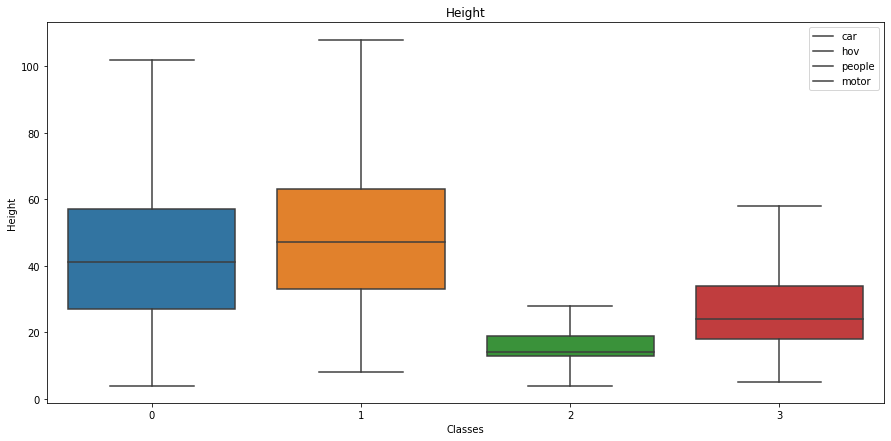

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize =(15,7))
sns.boxplot(data = height, showfliers = False)
# plt.hist(iou, bins = list(range(0, 100, 20)))
plt.xlabel("Classes")
plt.ylabel("Height")
# plt.xticks(list(range(0, 100, 20)))
plt.legend(classes)
plt.title('Height')
# Show plot
# plt.show()
plt.savefig('Height.jpg', cmap=plt.cm.hot)